In [3]:
from pandas import DataFrame
import matplotlib.pyplot as plt
import pandas as pd 
import numpy as np
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn import metrics
#Import the xls into a dataframe using pandas
file = r'Concrete_Data.xls'
df = pd.read_excel(file)
df.head() #Prints the first few rows 

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


In [3]:
df.describe()

,Cement (component 1)(kg in a m^3 mixture),Blast Furnace Slag (component 2)(kg in a m^3 mixture),Fly Ash (component 3)(kg in a m^3 mixture),Water (component 4)(kg in a m^3 mixture),Superplasticizer (component 5)(kg in a m^3 mixture),Coarse Aggregate (component 6)(kg in a m^3 mixture),Fine Aggregate (component 7)(kg in a m^3 mixture),Age (day),"Concrete compressive strength(MPa, megapascals)"
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.165631,73.895485,54.187136,181.566359,6.203112,972.918592,773.578883,45.662136,35.817836
std,104.507142,86.279104,63.996469,21.355567,5.973492,77.753818,80.175427,63.169912,16.705679
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.707115
50%,272.900000,22.000000,0.000000,185.000000,6.350000,968.000000,779.510000,28.000000,34.442774
75%,350.000000,142.950000,118.270000,192.000000,10.160000,1029.400000,824.000000,56.000000,46.136287
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


In [4]:
#Let Y contain the output variable compressive strength
#Let X contain the data regarding the features
Y = df['Concrete compressive strength(MPa, megapascals) ']
X = df.drop('Concrete compressive strength(MPa, megapascals) ', axis = 1)
#Perform train test split (80% train / 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2,random_state=1)

In [5]:
'''
    Hyperparameter tuning using Grid search CV 
'''
#Set the possible values for lambda
alphas = [i for i in range(1,1500)]
#Store the values of cross_val
stored = []

#Store the first set of data to test (e.g. 0.1)
regressor = Ridge(alpha = 0)
cross_scores = cross_val_score(regressor,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error')
stored.append(cross_scores.mean())
best_value = cross_scores.mean()
best_alpha = 0

#Loop for the remaining possible values of lambda 
for i in range(1,len(alphas)): 
    #Create a model with the given lambda 
    regressor = Ridge(alpha = alphas[i])
    
    #Store the value of cross-validated score
    cross_scores = cross_val_score(regressor,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error')
    stored.append(cross_scores.mean())
    
    #Update the values if a smaller value was found 
    if cross_scores.mean() < best_value :
        best_value = cross_scores.mean()
        best_alpha = alphas[i]
print('Best alpha %f Best Value %f'%(best_alpha,best_value))

Best alpha 0.000000 Best Value -105.910769


Text(0, 0.5, 'R^2 Scores')

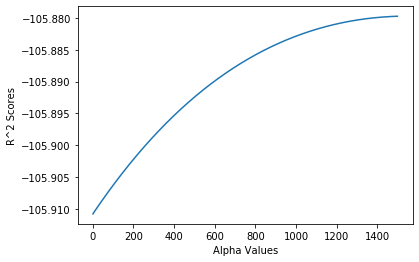

In [5]:
plt.plot(alphas, stored)
plt.xlabel('Alpha Values')
plt.ylabel('R^2 Scores')

In [6]:
#Create Ridge regression model using chosen alpha
regressor = Ridge(alpha = best_alpha)
regressor.fit(X_train,y_train)
y_pred = regressor.predict(X_test)

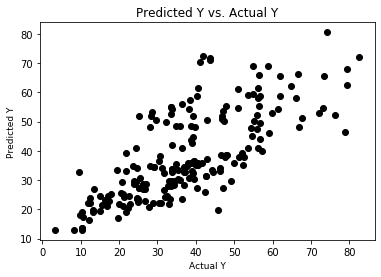

In [10]:
plt.title("Predicted Y vs. Actual Y")
plt.xlabel("Actual Y", fontsize = 9)
plt.ylabel("Predicted Y", fontsize = 9)
plt.scatter(y_test, y_pred,  color='black')

In [19]:
coeff_df = pd.DataFrame(regressor.coef_, X.columns, columns=['Coefficient'])  
coeff_df

,Coefficient
Cement (component 1)(kg in a m^3 mixture),0.124373
Blast Furnace Slag (component 2)(kg in a m^3 mixture),0.107789
Fly Ash (component 3)(kg in a m^3 mixture),0.092347
Water (component 4)(kg in a m^3 mixture),-0.145738
Superplasticizer (component 5)(kg in a m^3 mixture),0.318862
Coarse Aggregate (component 6)(kg in a m^3 mixture),0.015910
Fine Aggregate (component 7)(kg in a m^3 mixture),0.019428
Age (day),0.120048


In [75]:
#Performance metrics of the trained model 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))  
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('R^2 score:', regressor.score(X_test,y_test))

Mean Absolute Error: 8.816928643918235
Mean Squared Error: 124.4796243599265
Root Mean Squared Error: 11.157043710585995
R^2 score: 0.5225109155787108


In [76]:
#Cross-validation scores
r2 = cross_val_score(regressor,X_train,y_train,cv = 10,scoring = 'r2')
print('Cross-validated R2',r2.mean())
mae = cross_val_score(regressor,X_train,y_train,cv = 10,scoring = 'neg_mean_absolute_error')
print('Cross-validated MAE:',-mae.mean())
mse = cross_val_score(regressor,X_train,y_train,cv = 10,scoring = 'neg_mean_squared_error')
print('Cross-validated MSE:',-mse.mean())
print('Cross-validated RMSE:',np.sqrt(-mse.mean()))

Cross-validated R2 0.6219662523945074
Cross-validated MAE: 8.095735274045733
Cross-validated MSE: 105.87993929069258
Cross-validated RMSE: 10.289797825549956
